# Customer Churn Prediction

In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [348]:
data = pd.read_csv('data/bigml_59c28831336c6604c800002a.csv')

data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Data Understanding

The SyriaTel dataset contains 3333 rows and 21 columns. The columns are brokendown into these categories:

1. Customer Demographics is important to this predictor system becasue it will help the sales and marketing department understand the customer behaviour:

- state: This categorical variable might represent the customer's state of residence. While potentially useful for understanding geographic trends, its use 
might be limited due to privacy concerns.

- account length: number of months customers have held an account will the company

- area code: Similar to state, this categorical variable identifies the customer's area code.

- phone number: This unique identifier is likely anonymized for privacy reasons and not directly used in analysis.

2. Plan and Service Usage these columns will provide the prediction system with an understanding how charges impact customer churn:

- international plan: This binary variable indicates whether the customer has an international calling plan (1) or not (0).

- voice mail plan: This binary variable indicates whether the customer has a voicemail plan (1) or not (0).

- number vmail messages: This numerical variable represents the total number of voicemail messages received by the customer.

3. Call Activity these columns assists the prediction systems understand how customer trends and patterns affect the target variable:

- total day minutes, total day calls, total day charge: These numerical variables capture the total minutes spent, number of calls made, and total charges incurred during daytime hours.

- total eve minutes, total eve calls, total eve charge: Similar to the above, these features represent usage and charges for evening calls.

- total night minutes, total night calls, total night charge: These capture usage and charges for calls made at night.

- total intl minutes, total intl calls, total intl charge: These features represent the total minutes, number of calls, and charges associated with international calls.

4. Customer Service Interaction is a crucial feature in the telecommunications industry therefore this column will an impact KPI in the prediction system:

- customer service calls: This numerical variable indicates the total number of calls made by the customer to SyriaTel's customer service department.

5. Target Variable

- churn: This binary variable is the target variable of the dataset. It indicates whether the customer churned (1) or did not churn (0). This is the key variable used to predict customer churn.

## Overview of Dataset

- Check the following details about the dataset:

    1. Unique Values
   
    2. Statistical Description of Data
   
    3. Value count of target variables

    4. Dropping irrelevant columns



In [349]:
# View the Unique Values using .nunique()
data.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [350]:
# Get a brief overview using .info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [351]:
# Get statistical description of the data using .describe()
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [352]:
#Get the value counts of the target variable using .value_counts()
data['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

<Axes: xlabel='churn', ylabel='count'>

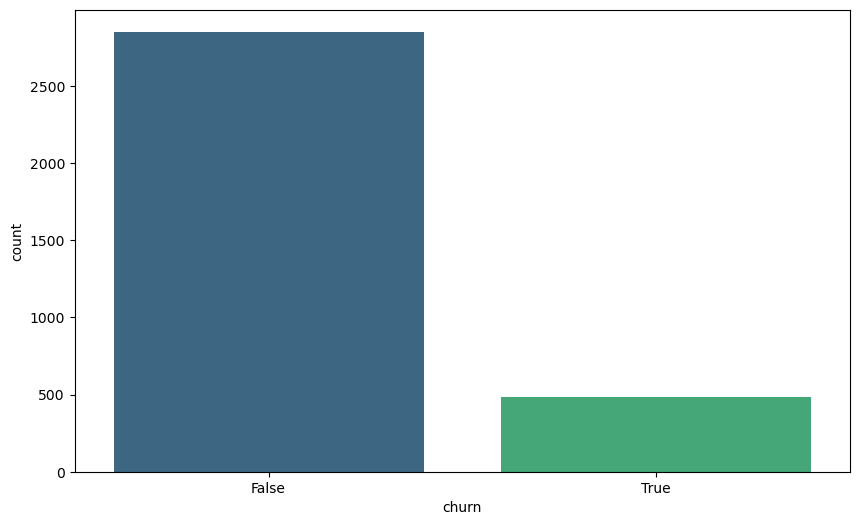

In [353]:
#Visualize the Value Counts using seaborns countplot
plt.figure(figsize=(10,6))

sns.countplot(x='churn',data=data,palette='viridis')

In [354]:
# Drop the phone number column.
data.drop(['phone number'],axis=1,inplace=True)
data.shape

(3333, 20)

# Justification

The phone number column has no relevance to the customer churn predictor model. The sales and marketing department will not need to include phone numbers in their sales stategy or ad campaigns.

# Data Pre-processing

**Check for missing values**

In [355]:
# Loop over all missing values

null_num = []

for i in data.columns:
    x = data[i].isnull().sum()
    null_num.append(x)

# Visualize the output using pd.Dataframe()
null = pd.DataFrame(null_num,index=data.columns,columns=['Total Missing Values'])
null

,Total Missing Values
state,0
account length,0
area code,0
international plan,0
voice mail plan,0
number vmail messages,0
total day minutes,0
total day calls,0
total day charge,0
total eve minutes,0


# Feature Engineering

- Combine the total day minutes and total eve minutes. Create a new column called Total Minutes

- Combine the total day calls and total eve calls. Create a new column called Total Calls

- Combine the total day charge and total eve charge. Create new column called Total Charge



In [356]:
# Create Total Minutes column by adding the corresponding columns together
data['total minutes'] = data['total day minutes'] + data['total eve minutes'] + data['total night minutes']
data['total calls'] = data['total day calls'] + data['total eve calls'] + data['total night calls']
data['total charge'] = data['total day charge'] + data['total eve charge'] + data['total night charge']

# Drop the original columns
data.drop(['total day minutes', 'total eve minutes','total night minutes'], axis=1,inplace=True)
data.drop(['total day calls', 'total eve calls', 'total night calls'], axis=1,inplace=True)
data.drop(['total day charge', 'total eve charge', 'total night charge'], axis=1,inplace=True)

data.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total minutes,total calls,total charge
0,KS,128,415,no,yes,25,10.0,3,2.70,1,False,707.2,300,72.86
1,OH,107,415,no,yes,26,13.7,3,3.70,1,False,611.5,329,55.54
2,NJ,137,415,no,no,0,12.2,5,3.29,0,False,527.2,328,59.00
3,OH,84,408,yes,no,0,6.6,7,1.78,2,False,558.2,248,65.02
4,OK,75,415,yes,no,0,10.1,3,2.73,3,False,501.9,356,49.36


# Feature Selection

In [357]:
# Create a copy of the data frame using .copy()
data_copy = data.copy()

# Encode categorical variables in the copy dataframe
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder()
# transform the variables using the .fit_transform() from the Label Encoder
data_copy['churn'] = label_encoder.fit_transform(data_copy['churn'])
data_copy['international plan'] = label_encoder.fit_transform(data_copy['international plan'])
data_copy['voice mail plan'] = label_encoder.fit_transform(data_copy['voice mail plan'])
data_copy['state'] = label_encoder.fit_transform(data['state'])  

# Split the copy data frame into independent and dependent (target) variable
X = data_copy.drop('churn', axis=1)
y = data_copy['churn']

# Train-test split the copy data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier with 100 estimators
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)

# Create a variable for the Feature Importance
feature_importances = random_forest_classifier.feature_importances_

# Get feature names from the copy data frame
feature_names = X.columns

# Create a data frame to store feature names and their importance values
feature_importance_data = pd.DataFrame({'Feature': feature_names,'Importance': feature_importances})

# Sort the data frame by importance values in descending order
feature_importance_data = feature_importance_data.sort_values(by='Importance', ascending=False)

print(feature_importance_data)


                   Feature  Importance
12            total charge    0.288462
9   customer service calls    0.140143
10           total minutes    0.119068
3       international plan    0.097676
7         total intl calls    0.054485
6       total intl minutes    0.051449
8        total intl charge    0.050201
11             total calls    0.043529
1           account length    0.040044
5    number vmail messages    0.038595
0                    state    0.032340
4          voice mail plan    0.031999
2                area code    0.012010


# Observation


## Top features: The features with the highest importance are:

•	Total charge (0.288): This proposes that customers who spend more on their mobile service are less likely to churn. This could be because they find value in the service and are more invested in using it.  
•	Sales and Marketing department can focus their efforts both creatively and financially towards high spending and high usage customers that have proved low probability of churning.

•	Customer service calls (0.140): Customers who repeatedly contact customer service might be more likely to churn, potentially signifying dissatisfaction or needing help with using the service effectively. 

•	Total minutes (0.119): Similar to total charge, higher overall usage in terms of call minutes is associated with lower churn probability. This recommends that engaged users are less likely to switch to another provider.

Implementation Proposals

1.	Loyalty programs: Reward programs, bonus points, or exclusive discounts based on their spending or usage.

2.	Personalized offers: Tailor plans and promotions based on their individual usage patterns and preferences.

3.	Improved customer service: Ensure their concerns are addressed promptly and efficiently.

4.	Self-service options: Provide user-friendly self-service options (online portals, mobile apps) to empower customers and address simple inquiries efficiently.


## International usage plays a role, but to a lesser extent:

International plan (0.098): Having an international calling plan is moderately important, indicating that customers who use international services might be a specific segment to focus on for churn prevention strategies.

Additional international call features (0.054 - 0.050): While not the most vital factors, the existence of features like total international calls, minutes, and charge still hold some significance, suggesting that users who make international calls are a customer segment worth considering in churn prevention efforts.

**Implementation Proposal**

1.	International usage segment: Targeted communication: Engage with customers who use international services through targeted campaigns promoting international calling plans, bundles, or special offers.

## Account characteristics and basic usage have a minimal influence:

Account length (0.040), number of voicemail messages (0.039), state (0.032), voice mail plan (0.032), and area code (0.012): These features have relatively low importance scores, suggesting that they have a weaker influence on customer churn compared to factors like spending and overall usage.

**Implementation Proposal**

•	Incentive usage: Offer limited-time promotions or discounts to encourage customers to increase their overall usage and discover the value proposition.




# Univariate Analysis

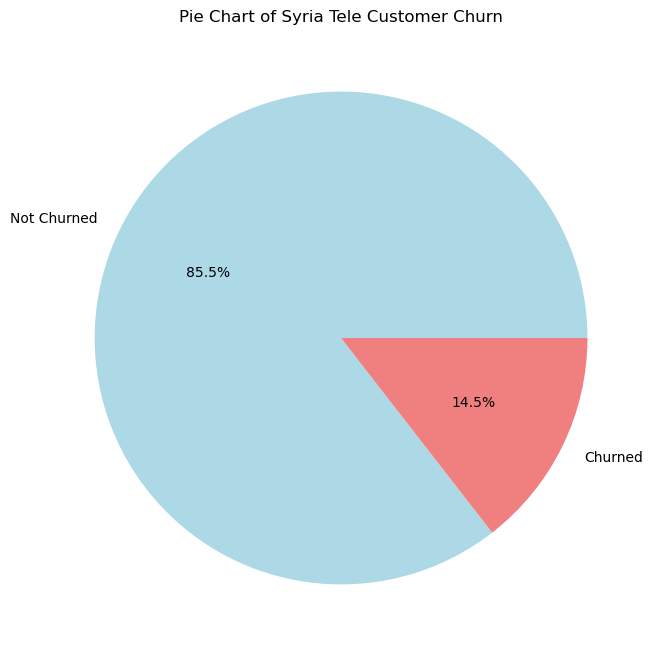

In [358]:
# Investigate the target variable - Pie Chart
plt.figure(figsize=(10, 8))
labels = ['Not Churned', 'Churned']
data['churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=labels, colors=['lightblue', 'lightcoral'])
plt.title('Pie Chart of Syria Tele Customer Churn')
# Remove y axis
plt.ylabel('')
plt.show()


## Observation
- The churned rate is at 14.5% and the not churned rate is 85.5%. Syria Tele's customer retention is moderately high.

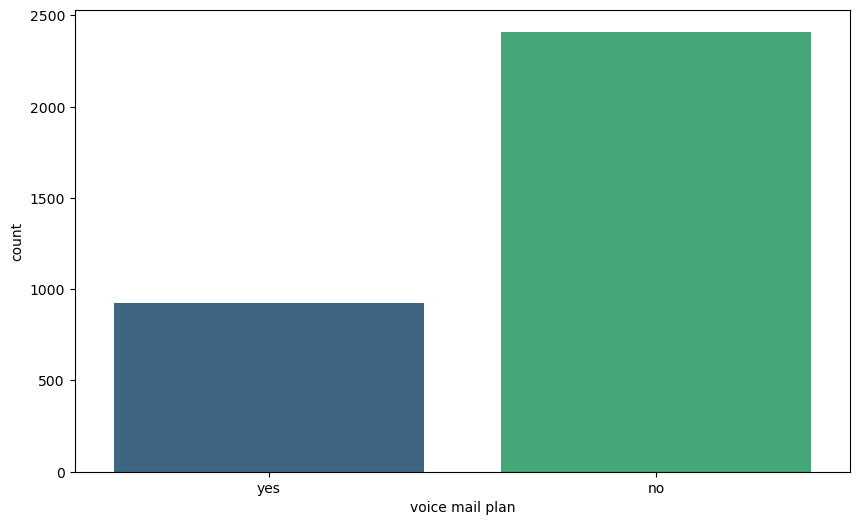

In [359]:
# Investigate the customers with voice mail plan
plt.figure(figsize=(10,6))
sns.countplot(x=data['voice mail plan'],palette='viridis')
plt.show()

#### Observation

**A high perecentage of the customers have not subscribed to a voice mail plan, this may be a factor contributing to low customer retention.**

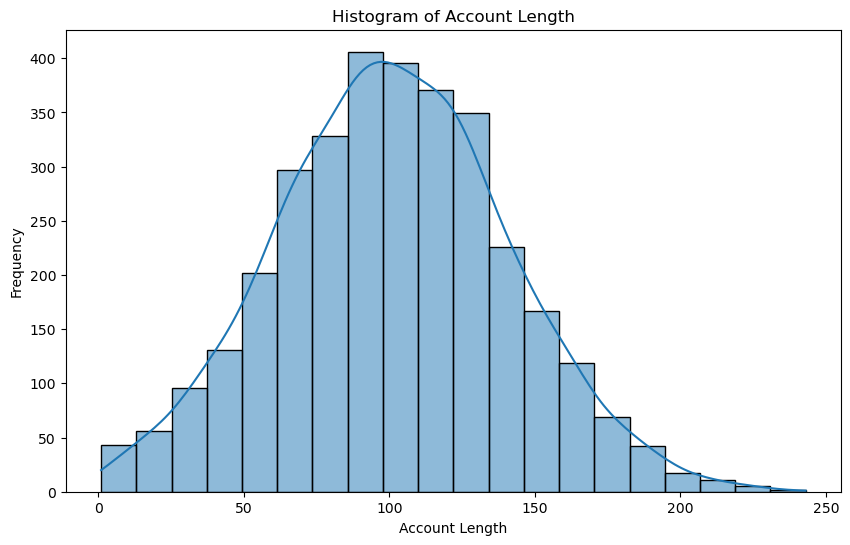

In [360]:
# Investigate the account length variable
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='account length', bins=20, kde=True)
plt.title('Histogram of Account Length')
plt.xlabel('Account Length')
plt.ylabel('Frequency')
plt.show()

## Observation

**Distribution** - The histrogram is skewed to the right. This may implies that Syria Tele's customers do not hold accounts for a long time. 

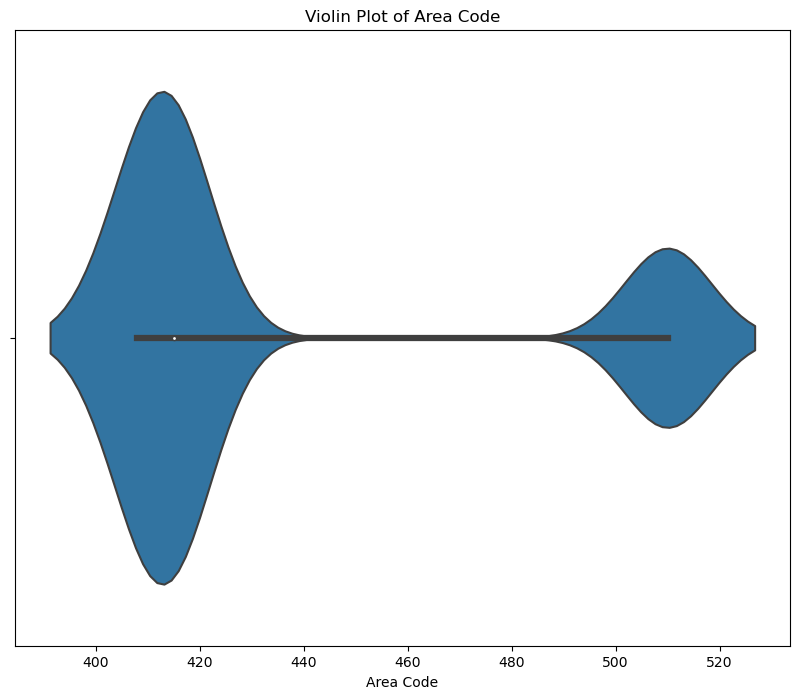

In [361]:
# Investigate the area code variable
plt.figure(figsize=(10,8))
sns.violinplot(x='area code',data=data)
plt.title("Violin Plot of Area Code")
plt.xlabel('Area Code')
plt.show()

## Observation
**Spread** - The width and shape of the violin communicates that a high number of customers  with area codes 400 to 420 live near the median.

**Outliers** - There are no outliers present

## Bivariate Analysis

- Conduct bivariate analysis on the same variables with the target variables

In [362]:
# Filter the dataset to include only the churned customers
churned_customers = data[data['churn'] == 1]
# Group the data by state and count the churned customers
state_churn_counts = churned_customers.groupby('state').size()
# Calculate the percentage of churned customers for each state using .size()
total_customers_per_state = data.groupby('state').size()
percentage_churn_per_state = state_churn_counts / total_customers_per_state * 100
# Apply the lambda function
percentage_churn_per_state_lambda = data.groupby('state')['churn'].apply(lambda x: (x.sum() / x.count()) * 100)
# Visualize the output using pd.Dataframe
churn_rate_data = pd.DataFrame({'Percentage Churn': percentage_churn_per_state})

churn_rate_data.head()

,Percentage Churn
state,
AK,5.769231
AL,10.000000
AR,20.000000
AZ,6.250000
CA,26.470588


In [363]:
# Find the top states with highest churn rate
top10 = churn_rate_data.sort_values(by='Percentage Churn', ascending=False).head(11)
top10 = pd.DataFrame(top10)
top10.head()

,Percentage Churn
state,
NJ,26.470588
CA,26.470588
TX,25.000000
MD,24.285714
SC,23.333333


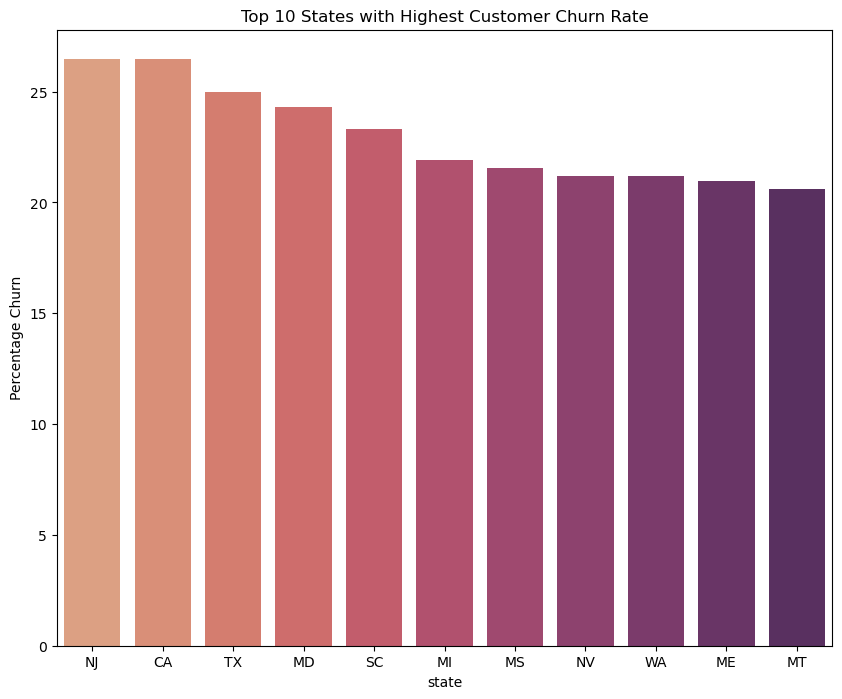

In [364]:
# Visulaize the top 10 States with Customer Churn
plt.figure(figsize=(10,8))
sns.barplot(x=top10.index, y='Percentage Churn', data=top10,palette='flare')
plt.title("Top 10 States with Highest Customer Churn Rate")
plt.show()

## Observation

**The following states have the highest customer churn:**
- NJ: New Jersey

- CA: California

- TX: Texas

- MD: Maryland

- SC: South Carolina

- MI: Michigan

- MS: Mississippi

- NV: Nevada

- WA: Washington

- ME: Maine

- MT: Montana

Syria Tel's sale and marketing department can use this insight to 

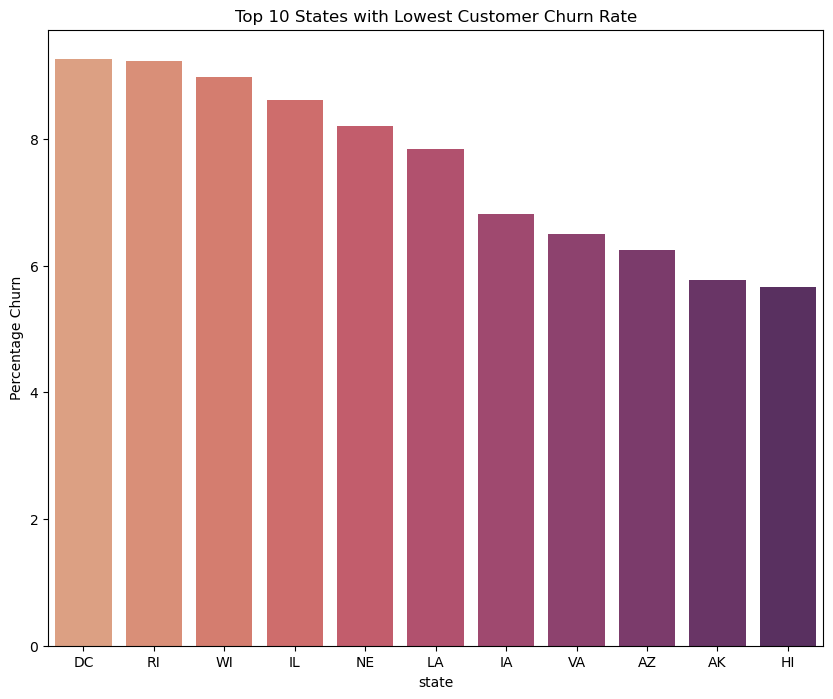

In [365]:
#Find States with lowest customer churn using .tail()
bottom10 = churn_rate_data.sort_values(by='Percentage Churn', ascending=False).tail(11)
top10 = pd.DataFrame(bottom10)
bottom10.head()

# Visualize the the outcome using sns.barplot
plt.figure(figsize=(10,8))
sns.barplot(x=top10.index, y='Percentage Churn', data=bottom10,palette='flare')
plt.title("Top 10 States with Lowest Customer Churn Rate")
plt.show() 

# Observation

The top 10 states with the lowest customer churn rate are the following:
DC: District of Columbia

RI: Rhode Island

WI: Wisconsin

IL: Illinois

NE: Nebraska

LA: Louisiana

IA: Iowa

VA: Virginia

AZ: Arizona

AK: Alaska

HI: Hawaii


## Observation

**The following states have the highest customer churn:**
- NJ: New Jersey

- CA: California

- TX: Texas

- MD: Maryland

- SC: South Carolina

- MI: Michigan

- MS: Mississippi

- NV: Nevada

- WA: Washington

- ME: Maine

- MT: Montana

Syria Tel's sale and marketing department can use this insight to 

**Investigate the target variable's relationship with individual variables**

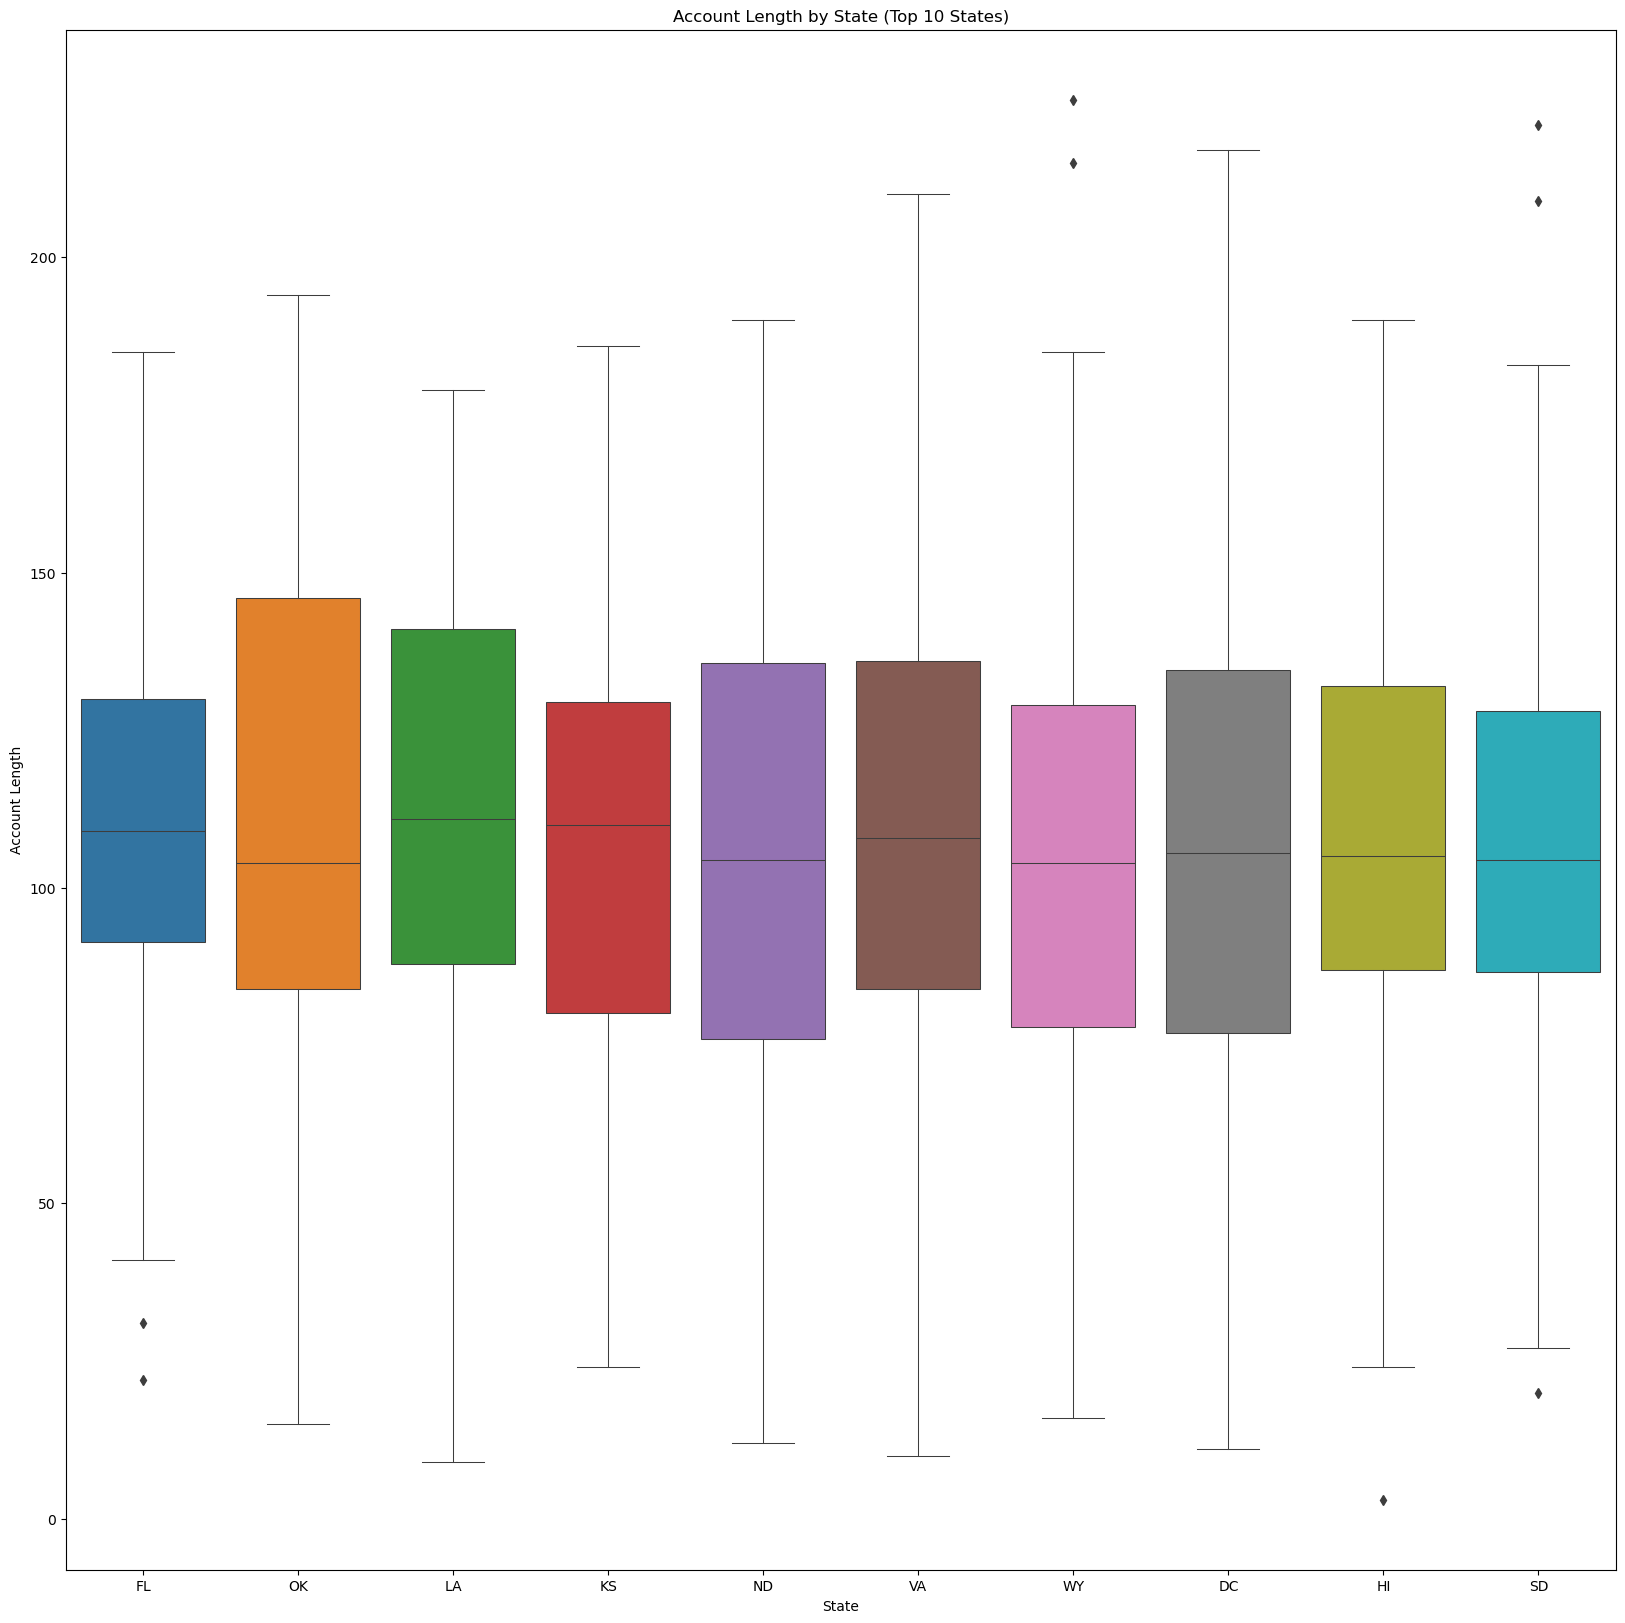

In [366]:
# Create a new variable that groups by state and takes top 10 states
top_states = data.groupby('state')['account length'].mean().sort_values(ascending=False).head(10).index.tolist()
# filter the grouped by data using .isin()
filtered_data = data[data['state'].isin(top_states)]
# Visualize the grouped data
plt.figure(figsize=(20, 20))
sns.barplot(x='state', y='account length', data=filtered_data, order=top_states, linewidth=0.75)
plt.title('Account Length by State (Top 10 States)')
plt.xlabel('State')
plt.ylabel('Account Length')
plt.show()


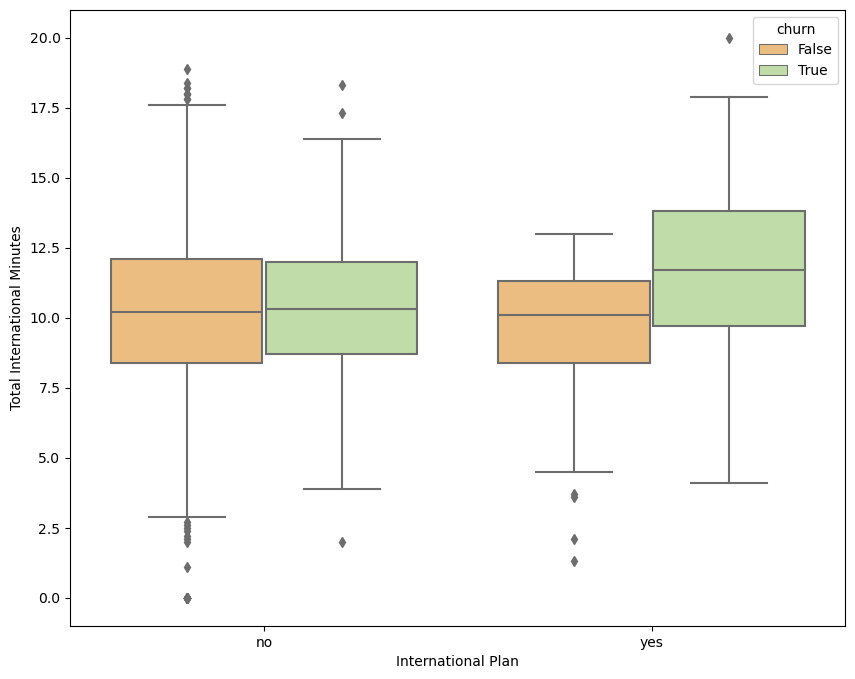

In [367]:
# Investigate the relationship between International Plan and Total International Minutes
plt.figure(figsize=(10,8))
sns.boxplot(x='international plan', y='total intl minutes', data=data, palette='Spectral',hue='churn')
plt.xlabel('International Plan')
plt.ylabel('Total International Minutes')
plt.show()

## Observation

**Box Size** - The box plot size indicates that the customers that have subscribed to the international plan have contributed to SyriaTele's customer churn rate. This observation of the data may imply the following:

1. Poor Customer Service - Syria Tel's customer that have subscribed to the international plan may not be satisfied with the manner their grivences are dealt with or the duration that is required for their grivences to be heard.

2. Poor Customer Experience - Syria Tel may need to evaluate the following factors that enhance customer experince:
    - Data speeds -Poor data speed will result to frustrated customers. Potentially increase the data speeds may improve the international plan's perfomance.

    - Lack of Roaming Packages - Syria Tel may need to introduce wholesale international call packages that help customers save. This is a better alternative to the traditional pay as you go option which may be more costly in the long run. 

    - Coverage - Ensuring that moblie telephone network is compatible with high amount international networks may give Syria Tel the edge over the competiton.

    - Cost - Conducting an enviromental scan of their industry may help Syria Tel to identify their customer's potential alternatives and the competition's pricing models may give Syria Tel an inclination into how they can restructure their pricing to reduce customer churn. 


# Multivariate Analysis

<Figure size 1000x600 with 0 Axes>

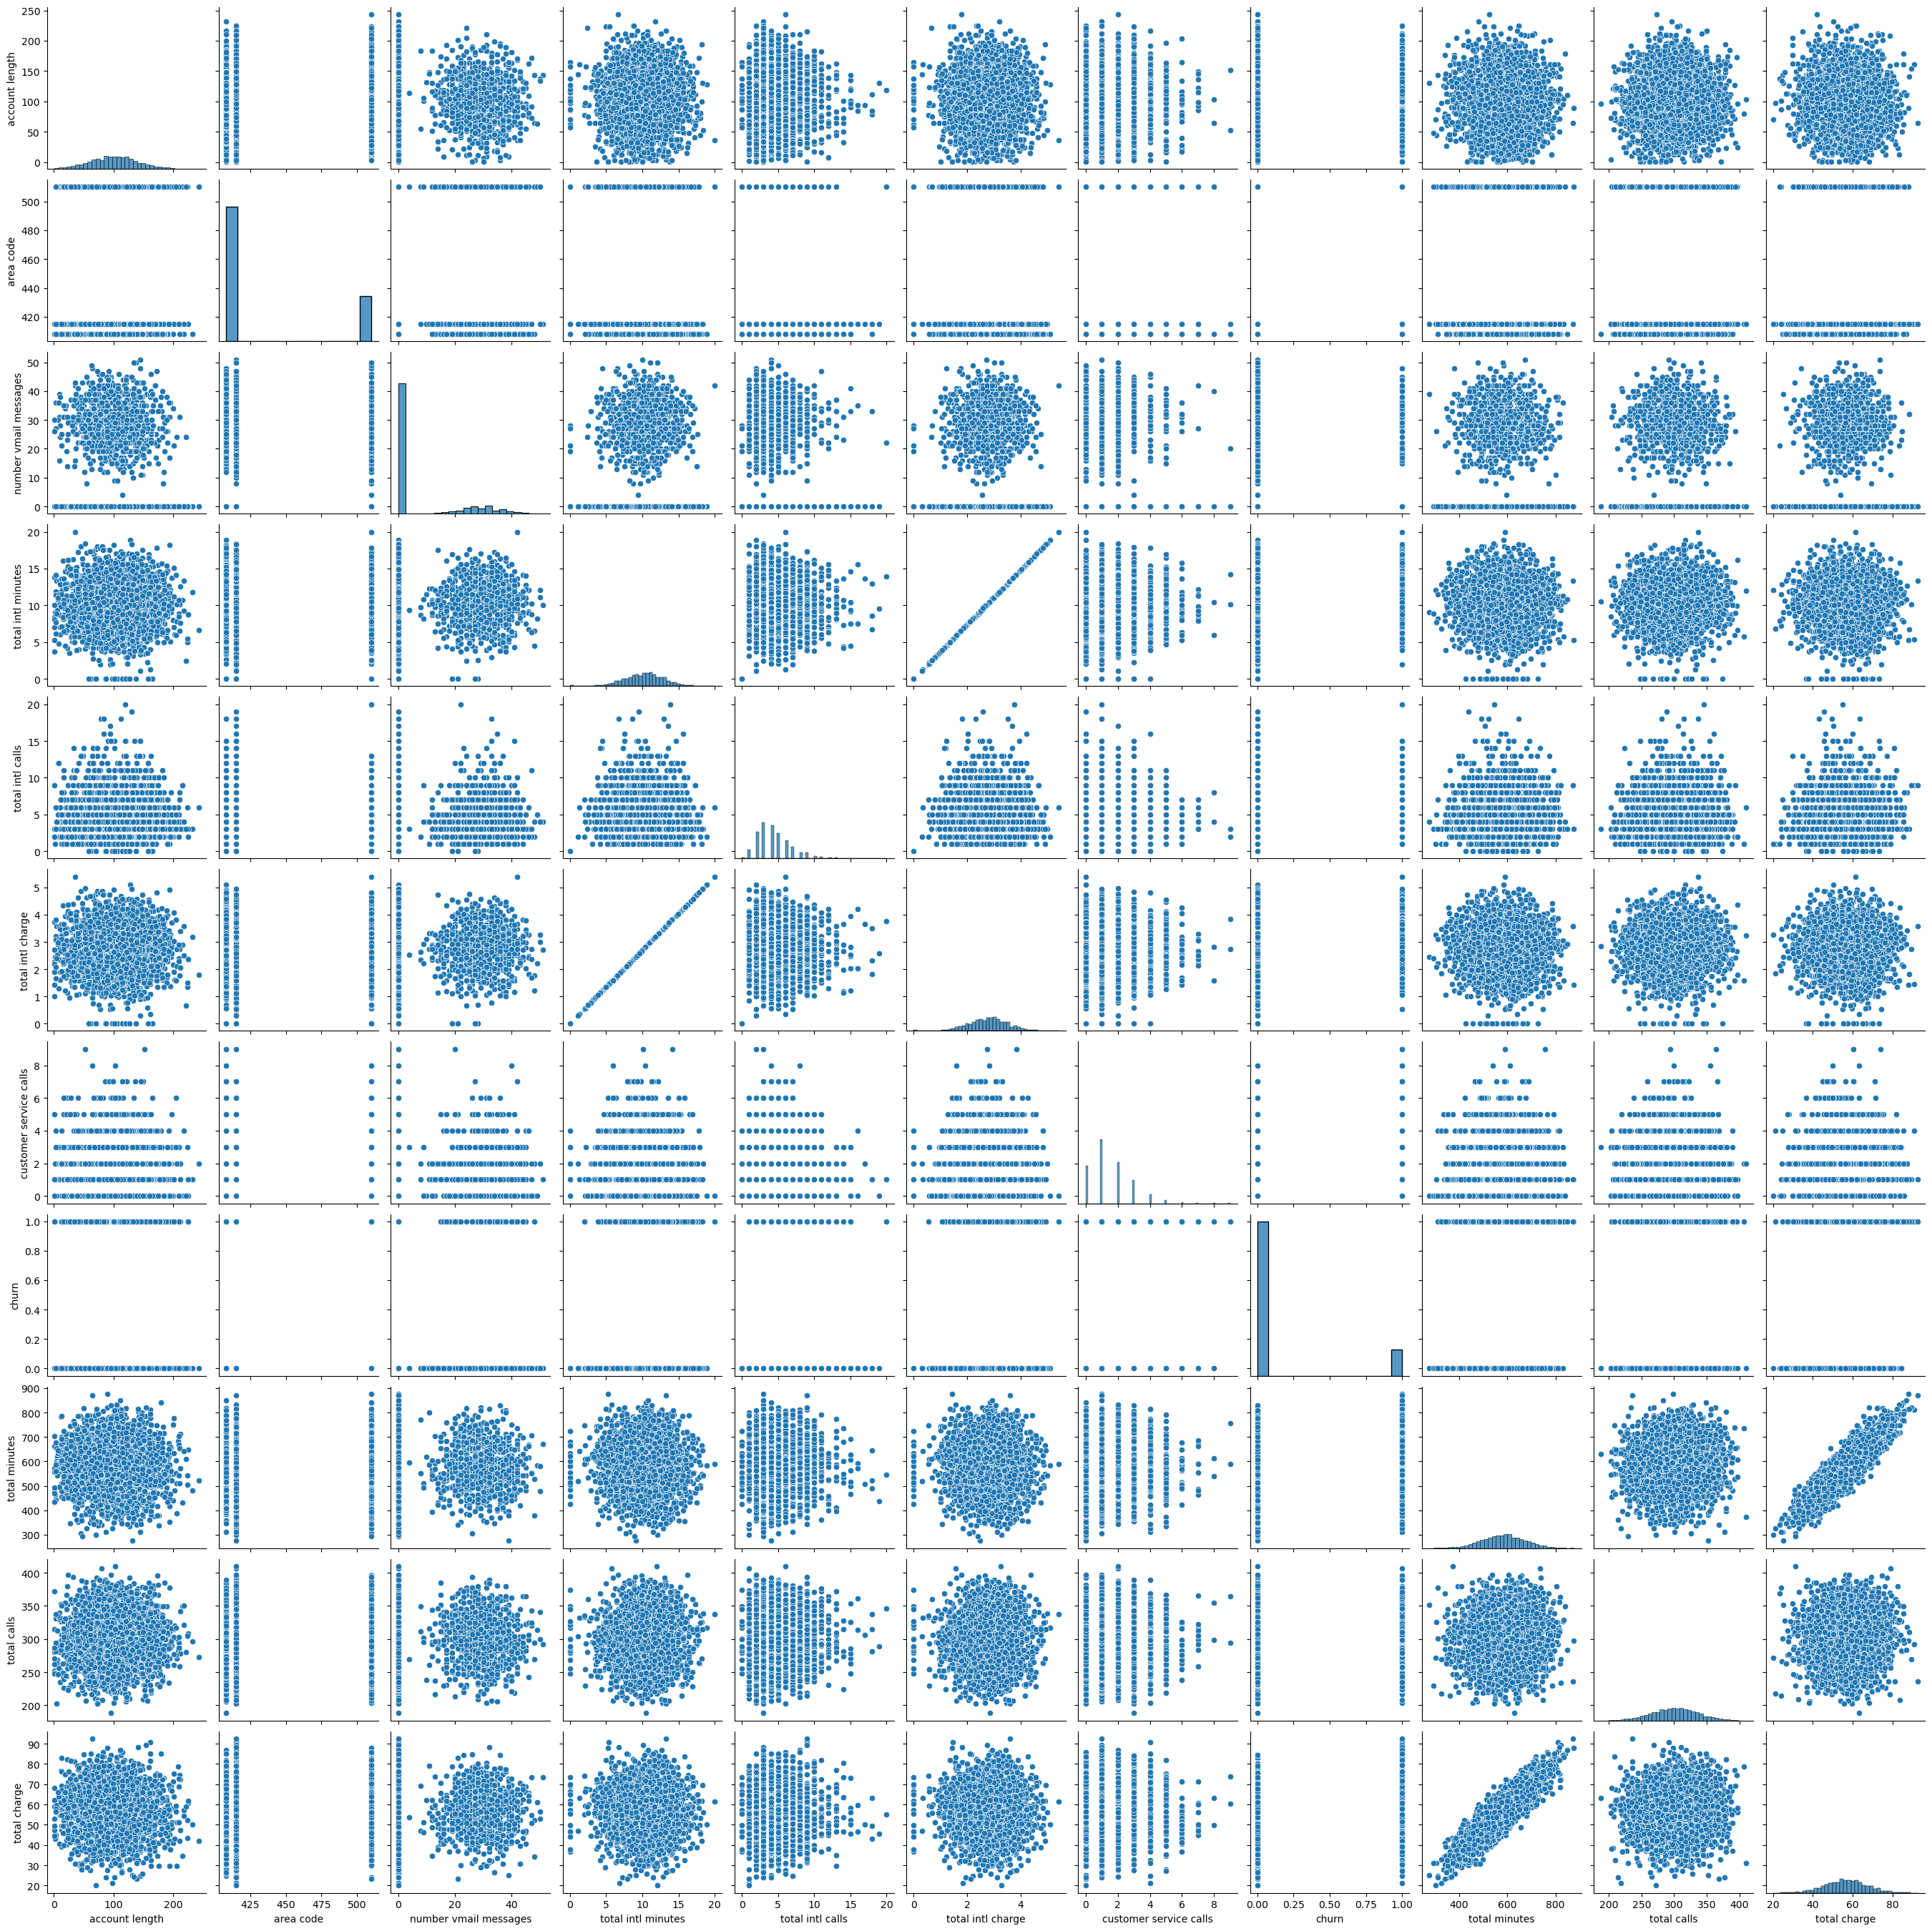

In [368]:
columns = data.columns
plt.figure(figsize=(10,6))
sns.pairplot(data[columns])
plt.show()


In [386]:
# Convert the copy data frame into numpy inorder to successful get the correaltion matrix
data_copy.to_numpy(dtype=float, na_value=np.nan, copy=False)
# Reorder the copy data frame and put churn in the first column using .reindex()
new_order = ['churn','state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls', 'total minutes', 'total calls', 'total charge']
data_copy = data_copy.reindex(columns=new_order)
data_copy.head()

,churn,state,account length,area code,international plan,voice mail plan,number vmail messages,total intl minutes,total intl calls,total intl charge,customer service calls,total minutes,total calls,total charge
0,0,16,128,415,0,1,25,10.0,3,2.70,1,707.2,300,72.86
1,0,35,107,415,0,1,26,13.7,3,3.70,1,611.5,329,55.54
2,0,31,137,415,0,0,0,12.2,5,3.29,0,527.2,328,59.00
3,0,35,84,408,1,0,0,6.6,7,1.78,2,558.2,248,65.02
4,0,36,75,415,1,0,0,10.1,3,2.73,3,501.9,356,49.36


## Correlation Matrix

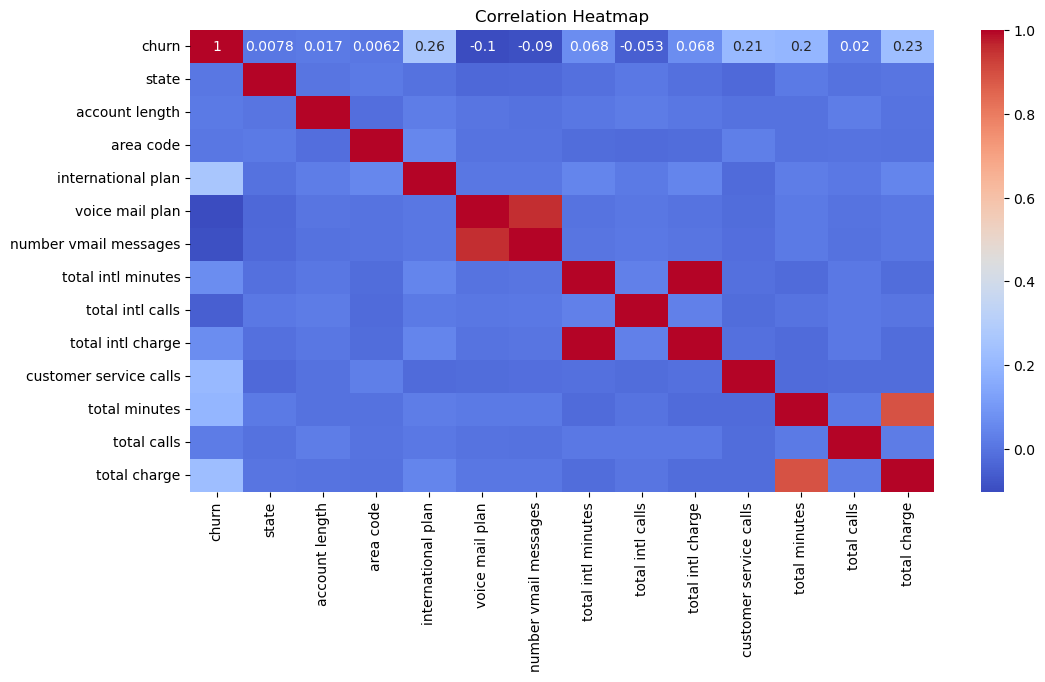

In [385]:
cnf_matrix = data_copy
correlation_matrix = cnf_matrix.corr()
plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


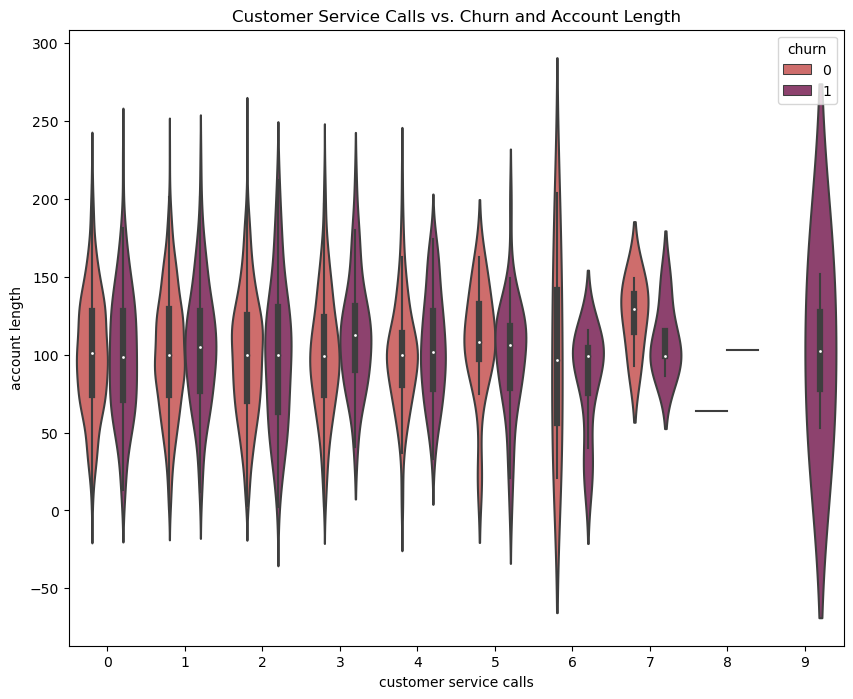

In [ ]:
plt.figure(figsize=(10,8))
sns.violinplot(x='customer service calls', y='account length', hue='churn', data=data,palette='flare')
plt.title('Customer Service Calls vs. Churn and Account Length')
plt.show()


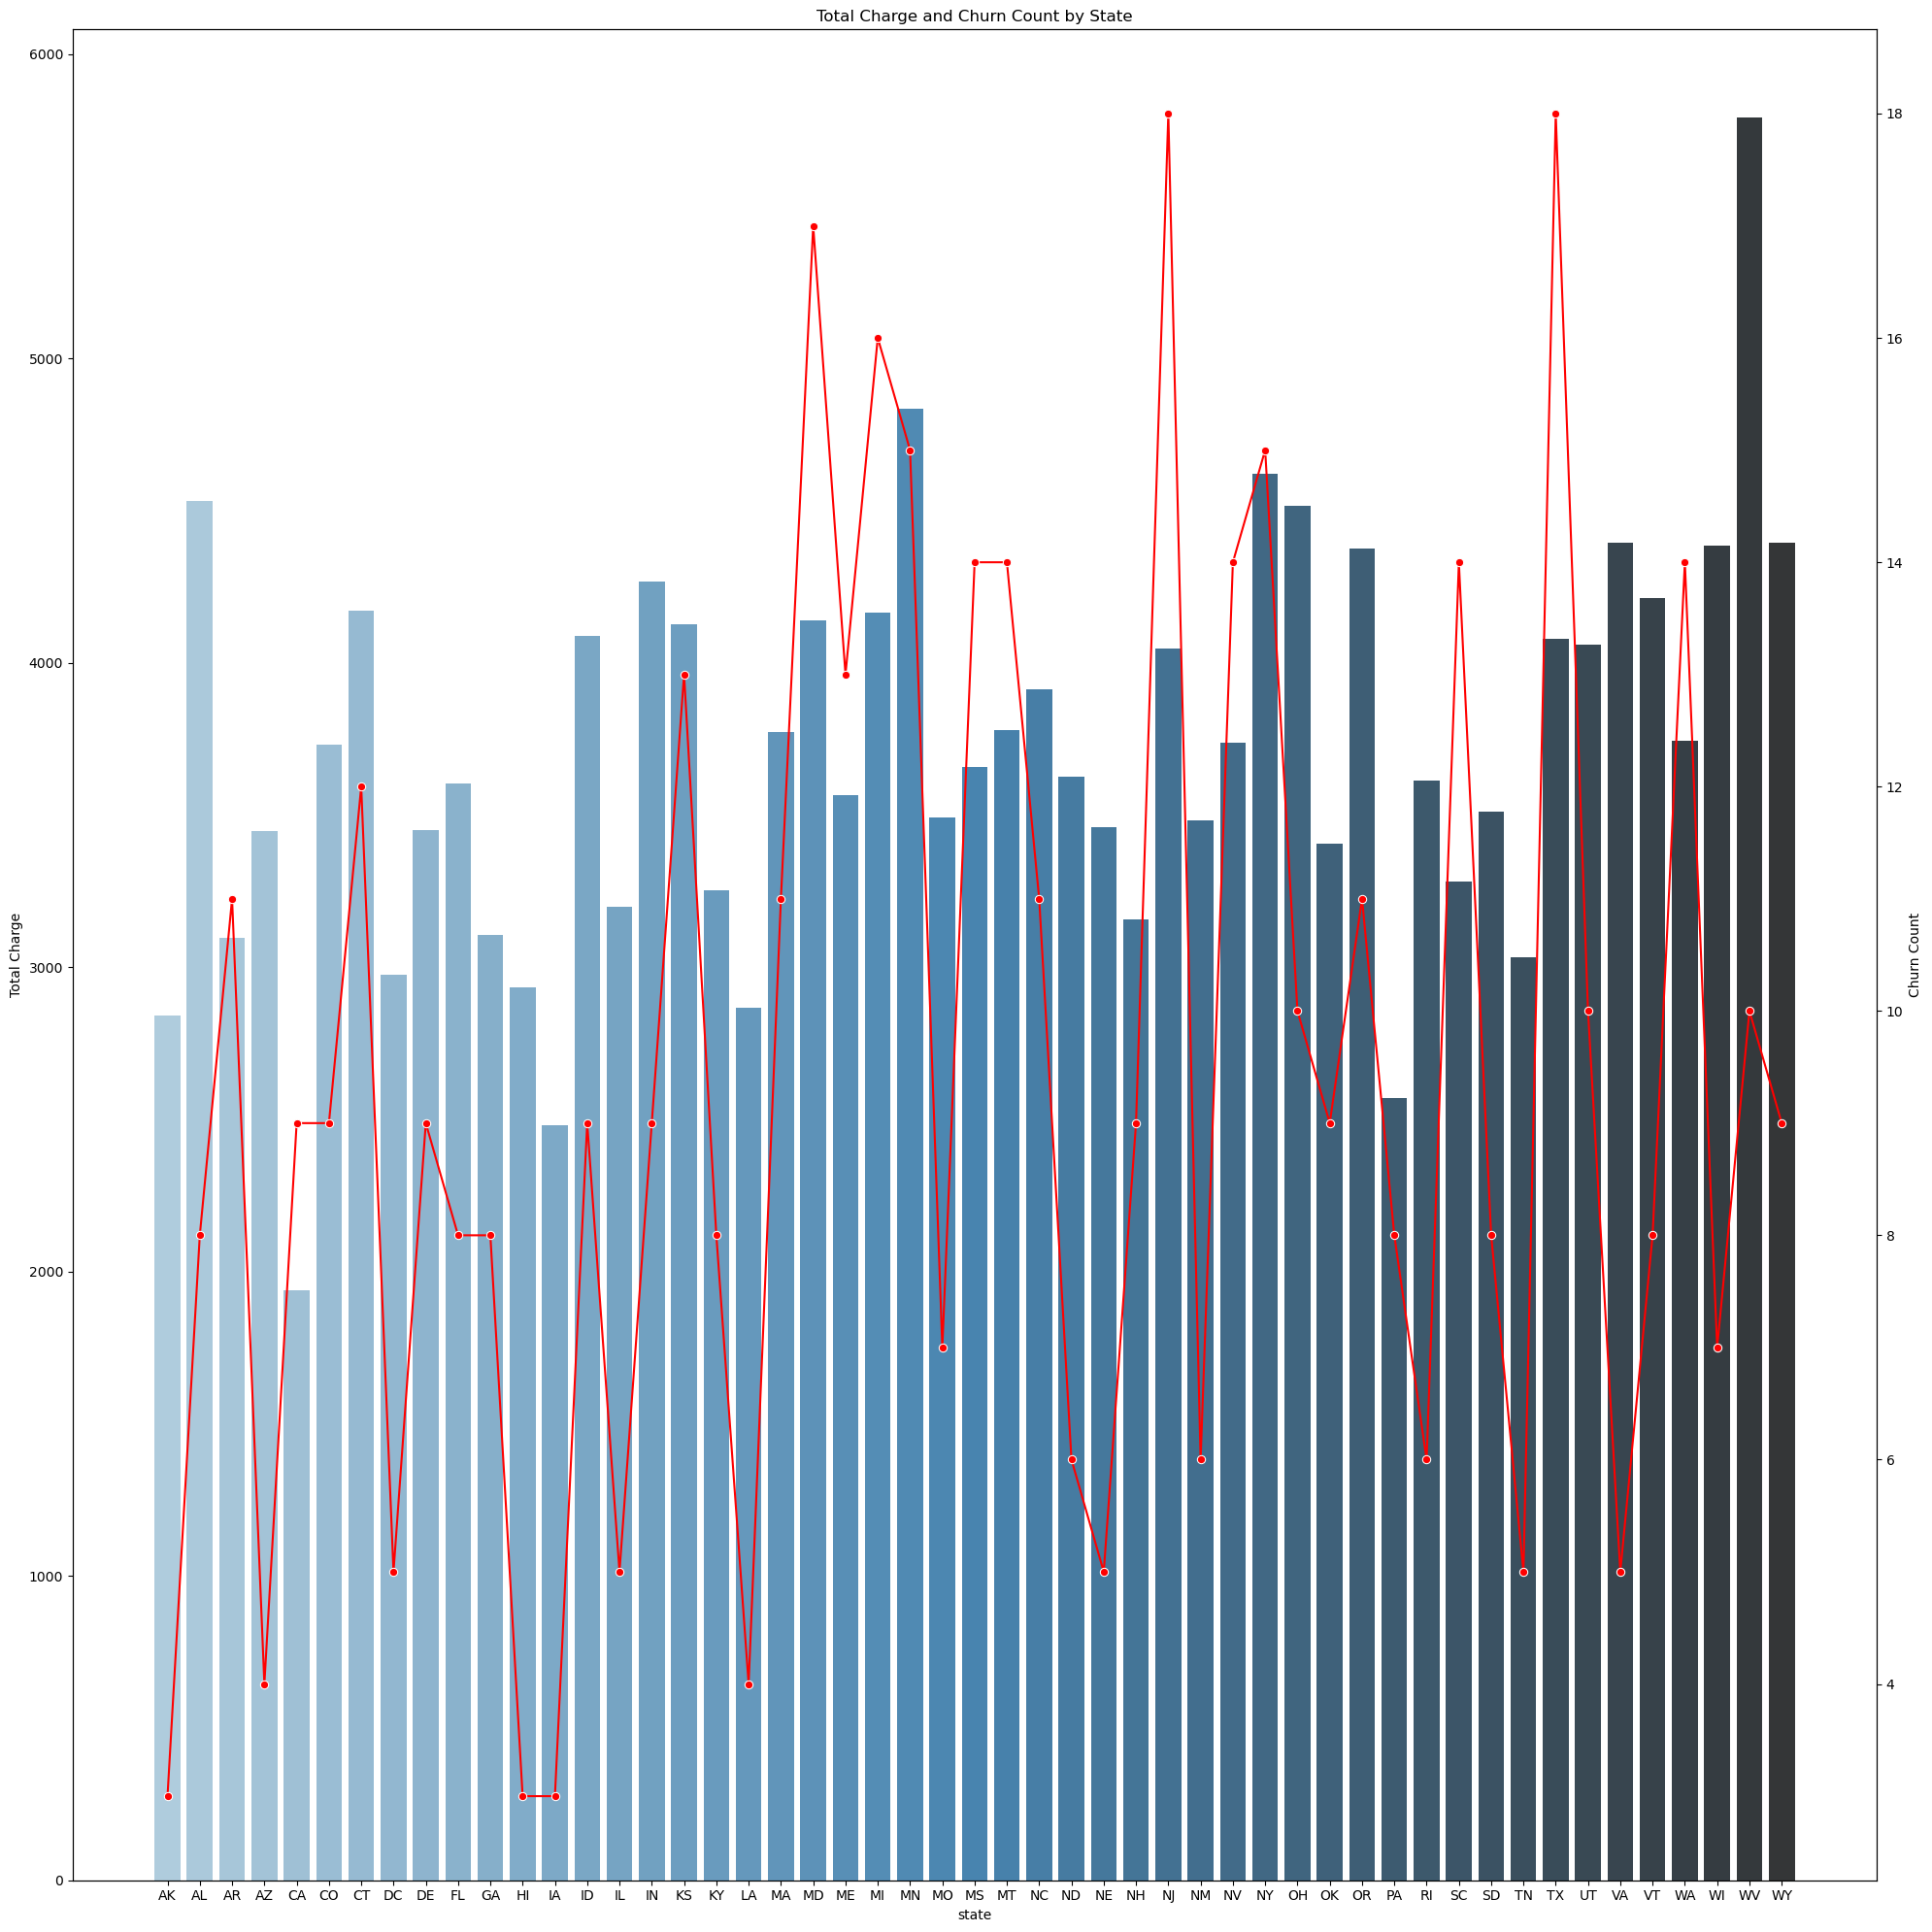

In [ ]:
# Assuming 'data' is your DataFrame with columns 'total charge', 'state', and 'churn'

# Grouping data by 'state' and calculating total charge and churn count
state_data = data.groupby('state').agg({'total charge': 'sum', 'churn': 'sum'}).reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(20, 20))

# Bar plot for total charge and state
sns.color_palette("light:#5A9", as_cmap=True)
sns.barplot(x='state', y='total charge', data=state_data, ax=ax1,palette='Blues_d')
ax1.set_ylabel('Total Charge')

# Creating a second y-axis for the line plot
ax2 = ax1.twinx()
sns.lineplot(x='state', y='churn', data=state_data, color='r', marker='o', ax=ax2)
ax2.set_ylabel('Churn Count')

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

plt.title('Total Charge and Churn Count by State')
plt.tight_layout()
plt.show()


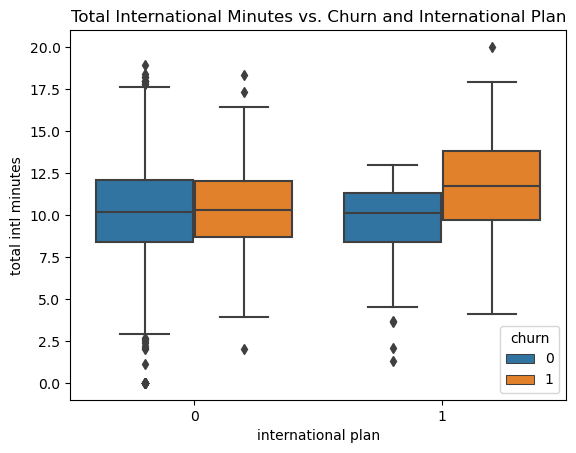

In [ ]:
sns.boxplot(x='international plan', y='total intl minutes', hue='churn', data=data)
plt.title('Total International Minutes vs. Churn and International Plan')
plt.show()
